<a href="https://colab.research.google.com/github/aqkarina-queiroz/estudos-dados/blob/main/case_nps_karina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Etapa 1: Instalar e importar bibliotecas
# Execute esta célula primeiro
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações visuais
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)


In [2]:
# Etapa 2: Upload do arquivo CSV
# Execute esta célula e selecione o arquivo 'case_base_dados_nps.csv'
from google.colab import files
uploaded = files.upload()


Saving case_base_dados_nps.csv to case_base_dados_nps.csv


In [3]:
# Etapa 3: Leitura e limpeza da base
# Ajusta nomes de colunas e trata caracteres especiais
import io

df = pd.read_csv(io.BytesIO(uploaded['case_base_dados_nps.csv']), sep=';', encoding='latin1')
df.columns = df.columns.str.strip().str.replace('�', 'ç').str.replace(' ', '_')
df.head()


,Safra,Canal,Classificação_NPS,Houve_Comentário,Tema_Comentário,Teor_Comentário
0,202302,INTERNET BANKING,DETRATOR,Não,NaN,NaN
1,202302,INTERNET BANKING,PROMOTOR,Sim,COBRANCA/BOLETOS/DDA,DUVIDA
2,202302,INTERNET BANKING,DETRATOR,Não,NaN,NaN
3,202304,INTERNET BANKING,DETRATOR,Não,NaN,NaN
4,202304,INTERNET BANKING,DETRATOR,Sim,OUTROS,NEUTRO


In [5]:
# Etapa 4: Cálculo do NPS por safra com formatação de data
# Converte a safra (formato YYYYMM) para datetime e depois para "Mês/Ano"
df['Safra'] = pd.to_datetime(df['Safra'].astype(str), format='%Y%m')
df['Safra_Formatada'] = df['Safra'].dt.strftime('%b/%Y')  # Ex: Jun/2023

# Agrupa e calcula o NPS
nps_counts = df.groupby(['Safra_Formatada', 'Classificação_NPS']).size().unstack(fill_value=0)
nps_counts['Total'] = nps_counts.sum(axis=1)
nps_counts['NPS'] = ((nps_counts.get('PROMOTOR', 0) - nps_counts.get('DETRATOR', 0)) / nps_counts['Total']) * 100

# Reordena cronologicamente
nps_counts = nps_counts.sort_index(key=lambda x: pd.to_datetime(x, format='%b/%Y'))

# Visualiza os dados
nps_counts[['PROMOTOR', 'NEUTRO', 'DETRATOR', 'NPS']]


Classificação_NPS,PROMOTOR,NEUTRO,DETRATOR,NPS
Safra_Formatada,,,,
Jan/2023,286,51,238,8.347826
Feb/2023,274,59,272,0.330579
Mar/2023,146,46,184,-10.106383
Apr/2023,265,62,296,-4.975923
May/2023,280,57,250,5.110733
Jun/2023,287,57,278,1.446945


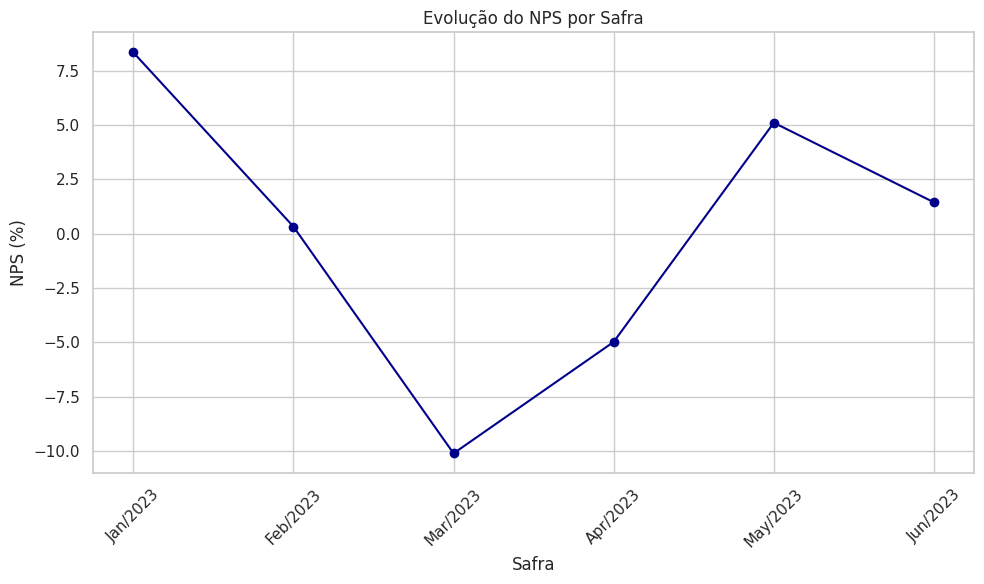

In [6]:
# Gráfico com datas formatadas no eixo X
plt.plot(nps_counts.index, nps_counts['NPS'], marker='o', color='darkblue')
plt.title('Evolução do NPS por Safra')
plt.xlabel('Safra')
plt.ylabel('NPS (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('grafico_nps_safra_formatado.png')
plt.show()


In [7]:
# Etapa 6: Temas mais citados nos comentários
temas_comentados = df[df['Houve_Comentário'] == 'Sim']['Tema_Comentário'].value_counts().head(10)
temas_comentados


,count
Tema_Comentário,
OUTROS,326
ATENDIMENTO/RELACIONAMENTO,263
USABILIDADE/NAVEGABILIDADE,104
PERFORMANCE/ESTABILIDADE,24
SEGURANCA/CONFIABILIDADE,18
TARIFAS/PRECO/JUROS,13
EXTRATO/COMPROVANTES,7
CREDITO/LIMITE/CARTAO,6
COBRANCA/BOLETOS/DDA,5


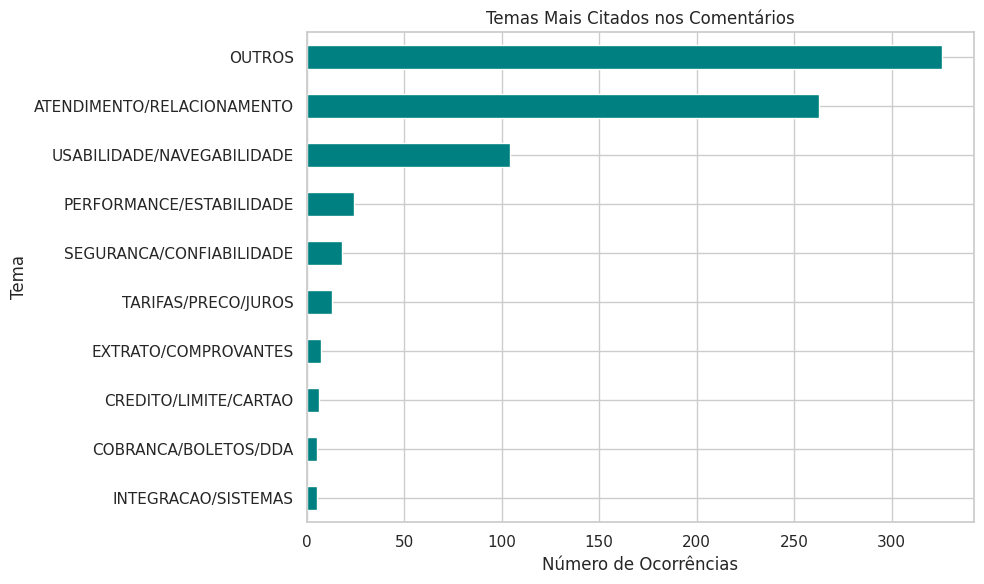

In [8]:
# Etapa 7: Gráfico de temas mais recorrentes
temas_comentados.sort_values().plot(kind='barh', color='teal')
plt.title('Temas Mais Citados nos Comentários')
plt.xlabel('Número de Ocorrências')
plt.ylabel('Tema')
plt.tight_layout()
plt.show()


In [10]:
# Etapa 8: Geração de resumo executivo
resumo = """
Resumo Executivo – Análise de Satisfação Clientes PJ

1. Evolução do NPS:
O NPS apresentou queda significativa ao longo das safras, saindo de valores positivos para negativos a partir de 202304.

2. Principais Temas dos Comentários:
Os temas mais recorrentes são: OUTROS, ATENDIMENTO/RELACIONAMENTO, USABILIDADE/NAVEGABILIDADE, SEGURANÇA/CONFIABILIDADE e PERFORMANCE/ESTABILIDADE.

3. Recomendações Estratégicas:
- Investir em melhorias de usabilidade e navegabilidade.
- Investigar a fundo a categoria "Outros" para descobrir problemas ocultos.
- Padronizar e melhorar a experiência de Atendimento e Usabilidade, que são temas que geram tanto elogios quanto reclamações.
- Analisar todos os comentários neutros, que contém elogio e sugestões, se possível ligar para entender o que falta para experiência ser nota 10.
- Reforçar o atendimento digital com foco em empatia e agilidade.
- Otimizar a performance e estabilidade das plataformas.
- Revisar políticas de tarifas e melhorar a comunicação com clientes.
"""

print(resumo)



Resumo Executivo – Análise de Satisfação Clientes PJ

1. Evolução do NPS:
O NPS apresentou queda significativa ao longo das safras, saindo de valores positivos para negativos a partir de 202304.

2. Principais Temas dos Comentários:
Os temas mais recorrentes são: OUTROS, ATENDIMENTO/RELACIONAMENTO, USABILIDADE/NAVEGABILIDADE, SEGURANÇA/CONFIABILIDADE e PERFORMANCE/ESTABILIDADE.

3. Recomendações Estratégicas:
- Investir em melhorias de usabilidade e navegabilidade.
- Investigar a fundo a categoria "Outros" para descobrir problemas ocultos.
- Padronizar e melhorar a experiência de Atendimento e Usabilidade, que são temas que geram tanto elogios quanto reclamações. 
- Analisar todos os comentários neutros, que contém elogio e sugestões, se possível ligar para entender o que falta para experiência ser nota 10.
- Reforçar o atendimento digital com foco em empatia e agilidade.
- Otimizar a performance e estabilidade das plataformas.
- Revisar políticas de tarifas e melhorar a comunicação c